In [ ]:

!gdown 13pNUzM3ywsmtbO7Rxkw9h6_5RxtRbUVW

Downloading...
From: https://drive.google.com/uc?id=13pNUzM3ywsmtbO7Rxkw9h6_5RxtRbUVW
To: /content/train.csv
100% 194M/194M [00:02<00:00, 65.8MB/s]


## Importing the libraries

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,Expert Name,Expert Phone,Customer Phone,Customer-to-Workman Score,Price,Deductibles,Discount,Commission Fee,Expert Financial Rewards,Expert Financial Penalties,...,damage_type_اسید,damage_type_خیس,damage_type_انداخته,damage_type_نمک,damage_type_جوهر,damage_type_خاموش,damage_type_ریخته_است,damage_type_لکه,damage_type_خش,label
0,رضا ایزانلو,9121863812,9122586430,5.000000,70000,555000,21000,-22000,21000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,شرکت خدماتی باران,9128574186,9372916484,4.000000,215000,0,0,-26130,12870,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,شرکت پارسیان,9197923176,9300638508,3.000000,200000,0,0,-24120,11880,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,شرکت خدماتی باران,9128574186,9121836557,1.000000,250000,0,0,-30150,14850,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,شرکت پارسیان,9197923176,9125422654,3.595395,280000,0,0,-33835,16665,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(df.shape)

(137220, 471)


In [ ]:
print(list(df.columns))

['Expert Name', 'Expert Phone', 'Customer Phone', 'Customer-to-Workman Score', 'Price', 'Deductibles', 'Discount', 'Commission Fee', 'Expert Financial Rewards', 'Expert Financial Penalties', 'Expert Joined on_year', 'Expert Joined on_month', 'Expert Joined on_day', 'Expert Joined on_day_of_week', 'Expert Joined on_hour', 'Desired Date_year', 'Desired Date_month', 'Desired Date_day', 'Desired Date_day_of_week', 'Desired Date_hour', 'Creation Date_year', 'Creation Date_month', 'Creation Date_day', 'Creation Date_day_of_week', 'Creation Date_hour', 'Desired Date_to_Creation Date_year', 'Desired Date_to_Creation Date_month', 'Desired Date_to_Creation Date_day', 'Desired Date_to_Creation Date_hour', 'Expert Joined on_to_Desired Date_year', 'Expert Joined on_to_Desired Date_month', 'Expert Joined on_to_Desired Date_day', 'Expert Joined on_to_Desired Date_hour', 'Gender_0.0', 'Gender_1.0', 'Base Cat_آموزش', 'Base Cat_باربری و جابجایی', 'Base Cat_باغبانی و فضای سبز', 'Base Cat_برقکاری', 'Base 

In [ ]:
df.isna().sum()

Expert Name                  0
Expert Phone                 0
Customer Phone               0
Customer-to-Workman Score    0
Price                        0
                            ..
damage_type_خاموش            0
damage_type_ریخته_است        0
damage_type_لکه              0
damage_type_خش               0
label                        0
Length: 471, dtype: int64

In [ ]:
df.drop(['Expert Phone', 'Customer Phone', 'Expert Joined on_year', 'Expert Joined on_month', 'Expert Joined on_day', 'Expert Joined on_day_of_week', 'Expert Joined on_hour', 'Creation Date_year', 'Creation Date_month', 'Creation Date_day', 'Creation Date_day_of_week', 'Creation Date_hour', 'Desired Date_to_Creation Date_year', 'Desired Date_to_Creation Date_month', 'Desired Date_to_Creation Date_day', 'Desired Date_to_Creation Date_hour'], axis=1, inplace=True)

##Groupby Expert Name

In [ ]:
df.groupby(by='Expert Name')['Expert Name'].count()

Expert Name
آرا امیریان           8
آرزو نقدی آزاد       14
آرش اصغری             1
آرش ترابی نژاد       47
آرش صفائی            52
                   ... 
یوسف یعقوبی          45
یونس احمدپور        132
یونس زارعی           61
یونس شریعت احمدی     85
یکتا صادقی            6
Name: Expert Name, Length: 2039, dtype: int64

In [ ]:
df.groupby(by='Expert Name')['label'].sum()

Expert Name
آرا امیریان         0.0
آرزو نقدی آزاد      0.0
آرش اصغری           0.0
آرش ترابی نژاد      0.0
آرش صفائی           0.0
                   ... 
یوسف یعقوبی         0.0
یونس احمدپور        0.0
یونس زارعی          0.0
یونس شریعت احمدی    0.0
یکتا صادقی          0.0
Name: label, Length: 2039, dtype: float64

##Number of Label = 1

In [ ]:
df[df['label'] > 0].shape[0]

35

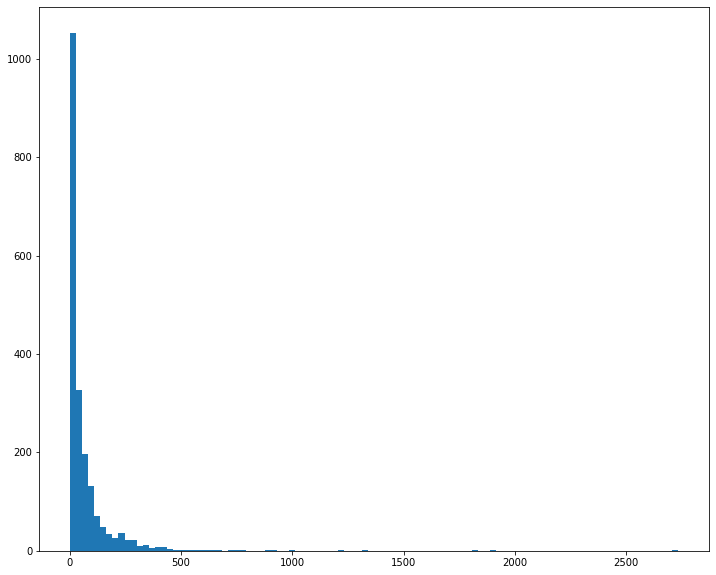

In [ ]:
plt.figure(figsize=(12,10))
plt.hist(df.groupby(by='Expert Name')['Expert Name'].count(), bins=100)
plt.show()

## Selecting Workers with of Works between 20, 1500 works:

In [ ]:
num_of_works = df.groupby(by='Expert Name')['Expert Name'].count()
names = num_of_works[num_of_works.between(20, 1500)].keys()

In [ ]:
df_final = df[df['Expert Name'].isin(names)]

In [ ]:
df.shape, df_final.shape

((137220, 455), (123669, 455))

In [ ]:
corr = pd.DataFrame(df_final.corrwith(df_final['label']))
corr[corr[0]>0.2]

,0
Expert phone,0.999712
damage_type_خسارت,0.399966
damage_type_شکسته,0.346379
damage_type_آسیب,0.346379
damage_type_شکستن,0.346379
damage_type_سوخته,0.399966
damage_type_شسته,0.282816
damage_type_خط,0.282816
damage_type_سوزاندند,0.282816
damage_type_خش,0.282816


##Deleting Expert Name Which contain 'شرکت':

In [ ]:
import re
Company = [x for x in df['Expert Name'].unique() if re.search('شرکت', x)]
Company, len(Company)

(['شرکت خدماتی باران',
  'شرکت پارسیان',
  'شرکت خدماتی نظافتی مهرآوه',
  'شرکت خدماتی افق ایرانیان',
  'شرکت خدماتی کمیاب',
  'شرکت کوشا صعود صنعت سبلان',
  'شرکت خدمات سمپاشی افشان طاهر',
  'شرکت تاسیساتی و گاز رسانی آروین آذر'],
 8)

In [ ]:
df_final_2 = df_final[~df_final['Expert Name'].isin(Company)]

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_final_2['Expert Name'] = le.fit_transform(df_final_2['Expert Name'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df_final_2.head()

,Expert Name,Customer-to-Workman Score,Price,Deductibles,Discount,Commission Fee,Expert Financial Rewards,Expert Financial Penalties,Desired Date_year,Desired Date_month,...,damage_type_اسید,damage_type_خیس,damage_type_انداخته,damage_type_نمک,damage_type_جوهر,damage_type_خاموش,damage_type_ریخته_است,damage_type_لکه,damage_type_خش,label
0,337,5.000000,70000,555000,21000,-22000,21000,0,2022,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,984,4.636364,100000,200000,0,-10000,0,0,2022,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,717,2.000000,255000,0,0,-12000,0,0,2022,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,493,4.589474,200000,0,0,-32000,0,0,2022,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,493,5.000000,650000,0,0,-104000,0,0,2022,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##Sort by Expert Name, Desired Data_year,month,day:

In [ ]:
df_final_2 = df_final_2.sort_values(by=['Expert Name', 'Desired Date_year', 'Desired Date_month', 'Desired Date_day', 'Desired Date_day_of_week', 'Desired Date_hour'])

Sample:

In [ ]:
df_final_2[df_final_2['Expert Name'] == 0]

,Expert Name,Customer-to-Workman Score,Price,Deductibles,Discount,Commission Fee,Expert Financial Rewards,Expert Financial Penalties,Desired Date_year,Desired Date_month,...,damage_type_اسید,damage_type_خیس,damage_type_انداخته,damage_type_نمک,damage_type_جوهر,damage_type_خاموش,damage_type_ریخته_است,damage_type_لکه,damage_type_خش,label
116314,0,5.0,130000,0,0,-25850,0,0,2021,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116303,0,5.0,145000,0,0,-29150,0,0,2021,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89037,0,4.5,210000,0,0,-41800,0,0,2021,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89141,0,5.0,210000,0,0,-41800,0,0,2021,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82506,0,5.0,169000,0,0,-33550,0,0,2021,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78986,0,2.0,225000,0,0,-44550,0,0,2021,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78397,0,4.5,230000,0,0,-45650,0,0,2021,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78137,0,4.5,210000,0,0,-41800,0,0,2021,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77943,0,4.5,170000,0,0,-34100,0,0,2021,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59533,0,4.0,230000,0,0,-45650,0,0,2021,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_final_2.index = np.arange(0, len(df_final_2))

In [ ]:
names_label_1 = df_final_2[df_final_2['label']==1]['Expert Name'].unique()
names_label_1.shape

(19,)

##Function for window size:

In [ ]:
def find_indices(arr, start_value, window=20):
  result = []
  flag = False
  for i in range(len(arr)):
    if arr[i] == 1:
      flag = True
      if i >= window:
        result.append((start_value+i-window+1, start_value+i+1))
  if(flag == False):
    for i in range(len(arr) // window):
      if len(result) < 6:
        result.append((i * window + start_value, (i + 1) * window + start_value))
  return result

##plot workers which has label = 1:

In [ ]:
ruin_indices = {}

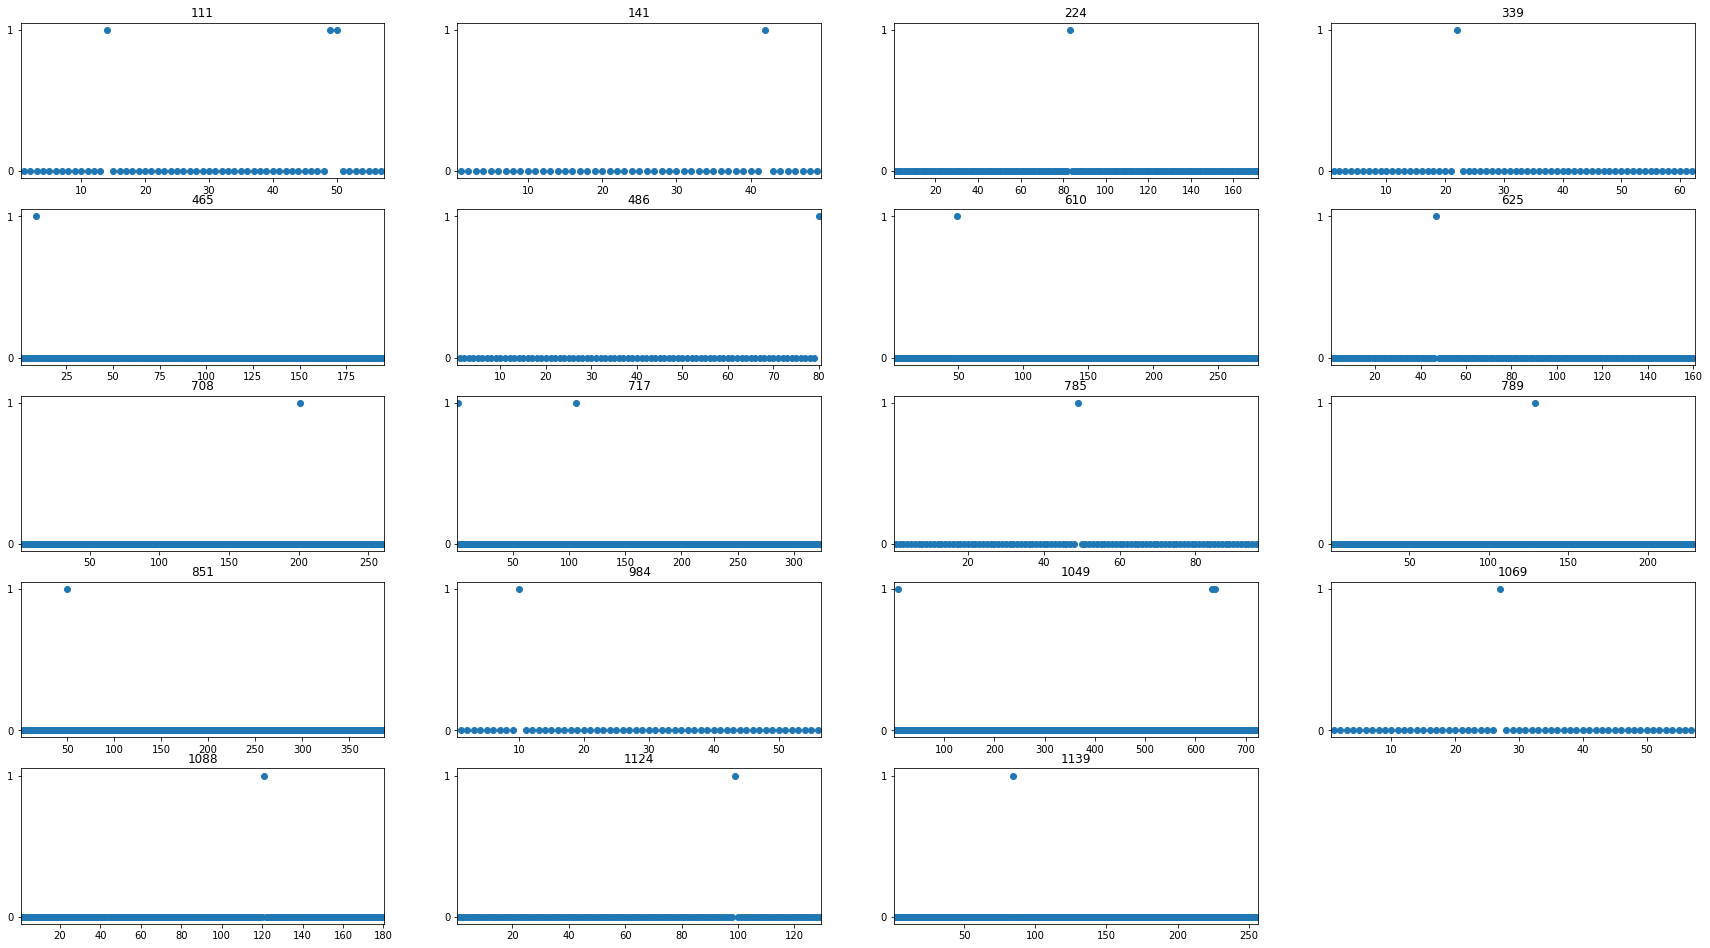

In [ ]:
plt.figure(figsize=(30, 20))
cnt = 1
for name in names_label_1:
    y = df_final_2[df_final_2['Expert Name'] == name]['label'].values
    x = range(1, len(y)+1)
    plt.subplot(6, 4, cnt)
    plt.scatter(x, y)
    plt.xlim(0.5, len(y)+0.5)
    plt.yticks([0, 1])
    plt.title(name)
    cnt += 1
plt.show()

In [ ]:
ruin_indices = {}
all_names = df_final_2[:]['Expert Name'].unique()
for name in all_names:
  y = df_final_2[df_final_2['Expert Name'] == name]['label'].values
  ruin_indices[name] = find_indices(y, df_final_2['Expert Name'].searchsorted(name))

##Finding index number for Windows:


In [ ]:
ruin_indices

{0: [(0, 20), (20, 40)],
 1: [(47, 67), (67, 87)],
 2: [(99, 119), (119, 139)],
 3: [(154, 174), (174, 194), (194, 214), (214, 234), (234, 254), (254, 274)],
 4: [(394, 414)],
 5: [(419, 439), (439, 459), (459, 479), (479, 499), (499, 519), (519, 539)],
 6: [(568, 588), (588, 608), (608, 628), (628, 648), (648, 668), (668, 688)],
 7: [(817, 837), (837, 857), (857, 877), (877, 897)],
 8: [(905, 925),
  (925, 945),
  (945, 965),
  (965, 985),
  (985, 1005),
  (1005, 1025)],
 9: [(1036, 1056)],
 10: [(1064, 1084), (1084, 1104)],
 11: [(1110, 1130)],
 12: [(1145, 1165)],
 13: [(1171, 1191)],
 14: [(1195, 1215),
  (1215, 1235),
  (1235, 1255),
  (1255, 1275),
  (1275, 1295),
  (1295, 1315)],
 15: [(1494, 1514),
  (1514, 1534),
  (1534, 1554),
  (1554, 1574),
  (1574, 1594),
  (1594, 1614)],
 16: [(1793, 1813),
  (1813, 1833),
  (1833, 1853),
  (1853, 1873),
  (1873, 1893),
  (1893, 1913)],
 17: [(2184, 2204),
  (2204, 2224),
  (2224, 2244),
  (2244, 2264),
  (2264, 2284),
  (2284, 2304)],
 

In [ ]:
type(ruin_indices)

dict

In [ ]:
df_final_3= pd.DataFrame()
indices_remain = []
for name_row in ruin_indices.keys():
  for j in ruin_indices[name_row]:
    for k in range(j[0], j[1]):
      indices_remain.append(k)
#print(indices_remain)
df_final_3 = df_final_3.append(df_final_2.iloc[indices_remain])

## building RNN:

In [ ]:
df_final_3

,Expert Name,Customer-to-Workman Score,Price,Deductibles,Discount,Commission Fee,Expert Financial Rewards,Expert Financial Penalties,Desired Date_year,Desired Date_month,...,damage_type_اسید,damage_type_خیس,damage_type_انداخته,damage_type_نمک,damage_type_جوهر,damage_type_خاموش,damage_type_ریخته_است,damage_type_لکه,damage_type_خش,label
0,0,5.000000,130000,0,0,-25850,0,0,2021,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,5.000000,145000,0,0,-29150,0,0,2021,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,4.500000,210000,0,0,-41800,0,0,2021,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,5.000000,210000,0,0,-41800,0,0,2021,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,5.000000,169000,0,0,-33550,0,0,2021,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122102,1146,4.758621,400000,0,0,-64000,0,0,2022,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122103,1146,5.000000,150000,120000,0,-26500,0,0,2022,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122104,1146,4.758621,600000,0,60000,-90000,60000,0,2022,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122105,1146,4.758621,550000,0,0,-88000,0,0,2022,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_final_3.shape

(72860, 455)

In [ ]:
len(df_final_3['Expert Name'].unique())

1145

In [ ]:
Y = np.array(df_final_3['label'].values)

In [ ]:
X = np.array(df_final_3.drop(['Expert Name', 'label', 'Desired Date_year', 'Desired Date_month', 'Desired Date_day', 'Desired Date_day_of_week', 'Desired Date_hour'], axis=1))

In [ ]:
X.shape

(72860, 448)

In [ ]:
X = X.reshape((3643, 20, 448))

In [ ]:
X.shape

(3643, 20, 448)

In [ ]:
X[0]

array([[5.00e+00, 1.30e+05, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [5.00e+00, 1.45e+05, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [4.50e+00, 2.10e+05, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [5.00e+00, 2.62e+05, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [4.50e+00, 1.70e+05, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [4.50e+00, 2.30e+05, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00]])

In [ ]:
Y.shape

(72860,)

In [ ]:
y = Y.reshape((20, -1))

In [ ]:
len(y)

20

In [ ]:
y[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
y == 1

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
print(type(y))
i = 1

if i in y:
    print("exist")

<class 'numpy.ndarray'>
exist


In [ ]:
result = np.where(y == 1)
print(result)

(array([ 1,  1,  1,  2,  3,  5,  8, 10, 10, 12, 12, 13, 13, 14, 18, 18, 18,
       18, 18, 19, 19]), array([3056, 3075, 3076, 1253, 2070, 2124,  915,  929, 1929,  543, 1263,
       2000, 2120, 2657, 1105, 1120, 1125, 2345, 3565, 2102, 2982]))


In [ ]:
y = y.sum(axis=0)

In [ ]:
result = np.where(y == 1)
print(result)

(array([ 543,  915,  929, 1105, 1120, 1125, 1253, 1263, 1929, 2000, 2070,
       2102, 2120, 2124, 2345, 2657, 2982, 3056, 3075, 3076, 3565]),)


In [ ]:
len(y)

3643

##Training the RNN:

In [ ]:
random_seed = 42   
n_time_steps = 20 # window size 
n_epochs = 5    
batch_size = 8
learning_rate = 0.01
l2_loss = 0.0015

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Dropout

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
!pip install keras_metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import keras_metrics

model = Sequential()
# RNN layer
model.add(LSTM(units = 448, input_shape = (20, 448)))
# Dropout layer
model.add(Dropout(0.2)) 
# Dense layer with ReLu
model.add(Dense(units = 256, activation='relu'))
# Softmax layer
model.add(Dense(1, activation = 'sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc', keras_metrics.precision(), keras_metrics.recall()])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 448)               1607424   
                                                                 
 dropout (Dropout)           (None, 448)               0         
                                                                 
 dense (Dense)               (None, 256)               114944    
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1,722,625
Trainable params: 1,722,625
Non-trainable params: 0
_________________________________________________________________


In [ ]:
C1 = np.count_nonzero(y == 1)
C0 = len(y) - C1
W0 = len(y)/(2*C0)
W1 = len(y)/(2*C1)
print('W0:',W0,'W1:',W1)

W0: 0.5028989508558808 W1: 86.73809523809524


In [ ]:
model.fit(X, y, epochs=n_epochs, batch_size=batch_size, verbose=1, class_weight={0: W0, 1: W1})

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras_metrics/metrics.py:26: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return object.__getattribute__(self, name)


456/456 [==============================] - 11s 6ms/step - loss: 2.4910 - acc: 0.9083 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2/5
456/456 [==============================] - 3s 6ms/step - loss: 1.3431 - acc: 0.6788 - precision: 0.0038 - recall: 0.1039
Epoch 3/5
456/456 [==============================] - 4s 9ms/step - loss: 1.3451 - acc: 0.5644 - precision: 0.0036 - recall: 0.1513
Epoch 4/5
456/456 [==============================] - 5s 11ms/step - loss: 0.8485 - acc: 0.6055 - precision: 0.0039 - recall: 0.2014
Epoch 5/5
456/456 [==============================] - 5s 12ms/step - loss: 0.8135 - acc: 0.6492 - precision: 0.0050 - recall: 0.2769


# evaluate the model

In [ ]:
loss, accuracy, f1_score, precision, recall = model.evaluate(X, y, verbose=0)
print('loss = ' ,loss)
print('accuracy = ' ,accuracy)
print('f1_score = ',f1_score)
print('precision = ',precision)
print('recall = ',recall)

ValueError: ignored